# Introduction to ML in `Python`
Today we are going to learn broadly the following: 
* Part 1 (ML basics and Synth Data)
    * What is and why do we use ML
    * Basic ML concepts, problem definition and pipeline
    * Synthetise data for supervised learning with `numpy`
    * Greedy (and fundamental) algorithms from scratch
    * Decision Trees from scratch
    * `sklearn`
* Part 2 (Titanic Example)
    * Exploratory Data Analysis
    * Feature Enginnering
    * Feature Selection
    * Data Visualization
    * Apply the basic ML algorithms that we have learned to a real problem

## What is ML?

*Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead.*

## When it started?
Is important to know the history of DA to know where we are. The difference between DA and ML is not that big, and we will explain why later.

https://en.wikipedia.org/wiki/Timeline_of_machine_learning

## Why do we use ML?
The real point of ML is to help humans, research or business. Extract real value from the data.

To go further than descriptive statistics, we need good estimators / classifiers that can simulate the reality with good acc levels. Today we build these estimators using ML or DL as they can encode more complex patterns than non learning models.

From the analysis of those well fitted estimators, we can extract useful data insights. This is the difference between DA and descriptive statistics. 

### Employee churn Example
Imagine that our employees are leaving our company. What do we really want to do is to fix this problem.

Our Data Analyst says that he has built a model that predicts with a 99% of acc if our employees are going to leave in less than one week. Is this enough? Is this DA? Or is just an score?

**Better score == solutions?**

**ML/DL == DA?**

<img src="img/DA_over_time.png" width="400">



## But we can always have better scores?

The short answer is NO (this is one reason of why kaggle is very useful). It was already proofed many years ago. Thus, the optimal decision exists, and if the risk (or the error) is not 0, we won't be able to achieve 100% accuracy no matter what model we try.

## ML problem workflow
There are different ways to stream data into machine learning, but many authors agree on the following steps:

1. Define Problem
2. Specify Inputs & Outputs
3. Exploratory data analysis
4. Data Selection
5. Data Preprocessing
6. Data Cleaning
7. Visualization
8. Model Design, Training, and Offline Evaluation
9. Model Deployment, Online Evaluation, and Monitoring
10. Model Maintenance, Diagnosis, and Retraining

Of course, the same solution can not be provided for all problems, so the best way is to create a general framework and adapt it to new problem.

## Synth Data 

In [1]:
import numpy as np
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt

"Bayes reg error" assuming MSE loss is 0.010000000000000002


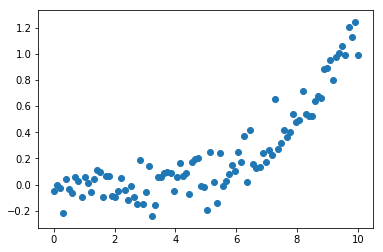

In [2]:
x = np.linspace(0,10,100)
y = []
for point in x:
    y.append(np.random.normal(polyval(point,np.array([1,-2,3,-4,5])/4e4),1e-1,1))
plt.scatter(x,np.array(y));
print(f'"Bayes reg error" assuming MSE loss is {1e-1**2}')

##equivalent to generating y as
y = polyval(x,np.array([1,-2,3,-4,5])/4e4) +  np.random.normal(0,1e-1,x.shape) # (1 + -2*x + 3*x^2 - 4*x^3 + 5x^4)/4e4

## Kaggle competitions
Far from being perfect, kaggle competitions tend to be a double-edge sword. Kaggle is probably one of the best tools available today, but not everything is about increasing score on the third decimal.

https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/leaderboard

## Which kinds of problems can we solve?
The basics are:
* Classification: Binary, more than one label, or multiclass $g:\mathbb{R}^d \longrightarrow \{1,..,M\}$
* Regression: Time dependent or not $g:\mathbb{R}^d \longrightarrow \mathbb{R}$
* Clustering $g \approx P(X)$

But there are many others such as translation, anomaly detection, etc.

## Which data types can we use?
* Structured: mainly columnar data
* Unstructured: image,sound,video,text,...

## Survey on DA concepts:

* Train Validation Test sets
* Accuracy
* Feature
* Label
* Dependent Variable / Independent Variable
* Hyper-parameters

https://developers.google.com/machine-learning/glossary/?hl=en-419

We are going to review some of those concepts in every lesson.

## Keep working with synth data
We are going to build a linear regression to see how it performs. To measure the error we are going to use MSE:
$$\frac{1}{m}\sum_{i=1}^m||\widehat{y}_i-y_i||^2_2$$

Following the ML phylosophy of learning from the data, and generalizing on unseen data, we need a training set. 

In [3]:
x_train = x[:60]
y_train = y[:60]

So our linear regression is a model such as:
$$\widehat{y} = \omega x$$
And now we need to minimize the MSE with respect to $\omega$ to find the best linear regression (only using training data).
$$\frac{1}{m}\nabla_\omega ||x^{(train)}\omega - y^{(train)}||^2_2 = 0$$
which is equivalent to:
$$\omega = \Big(x^{(train)T}x^{(train)}\Big)^{-1}x^{(train)T}y^{(train)}$$

In [4]:
omega = np.dot(np.dot(x_train,x_train.T)**-1,np.dot(x_train.T,y_train));omega

0.009258374574410004

In [5]:
y_pred = omega*x_train

In [6]:
def mse(preds,labels):
    return (np.square(preds - labels)).mean()

In [7]:
mse(y_pred,y_train),mse(omega*x,y)

(0.008941516955608738, 0.1274952718355047)

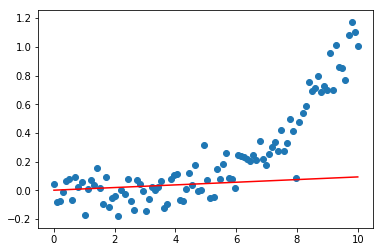

In [8]:
plt.scatter(x,y)
plt.plot(x,omega*x,c="r");

Hmmmm, what are we doing wrong? Maybe if we select the data at random instead of the first 60 points? **is one of the principles of statistical learning theory, sample the data with the same probability distribution on the training set than on the test set**

In [9]:
idxs = np.random.randint(0,x.shape[0],40).tolist()
x_train = x[idxs]
y_train = y[idxs]

In [10]:
omega = np.dot(np.dot(x_train,x_train.T)**-1,np.dot(x_train.T,y_train));omega 

0.06612878338001432

In [11]:
mse(omega*x_train,y_train),mse(omega*x,y)

(0.06391560520936485, 0.05083737678919237)

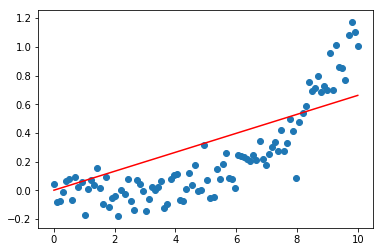

In [12]:
plt.scatter(x,y)
plt.plot(x,omega*x,c="r");

Maybe we need a model which is a little bit more complex? **we are underfitting**:
$$\widehat{y} = b + \omega_1 x + \omega_2 x^2$$
The previous equation of $\nabla_\omega = 0$ stills being the same but now in a matrix form looks like:

$\begin{bmatrix}y_{1}\\y_{2}\\y_{3}\\\vdots \\y_{n}\end{bmatrix} = \begin{bmatrix}1&x_{1}&x_{1}^{2}\\1&x_{2}&x_{2}^{2}\\1&x_{3}&x_{3}^{2}\\\vdots &\vdots &\vdots \\1&x_{n}&x_{n}^{2}\end{bmatrix} \cdot \begin{bmatrix}b\\\omega _{1}\\\omega _{2}\end{bmatrix}$

So what we have to compute is:
$$\widehat{\omega}=\Big(\mathbf{X}^{\mathsf{T}}\mathbf{X}\Big)^{-1}\cdot\Big(\mathbf{X}^{\mathsf{T}}\cdot\vec{y}\Big)$$

In [13]:
def lin_reg(x,y):
    return np.dot(np.linalg.inv(np.dot(x,x.T)),np.dot(x,y)) ## rm .T to make shapes coincide

x_train_reg = np.vstack([np.ones(x_train.shape),x_train,x_train**2])
omegas = lin_reg(x_train_reg,y_train);omegas

array([ 0.13671759, -0.13309091,  0.0228472 ])

In [14]:
mse(omegas[0]+omegas[1]*x_train+omegas[2]*x_train**2,y_train),mse(omegas[0]+omegas[1]*x+omegas[2]*x**2,y)

(0.00906916730304711, 0.011105813705020789)

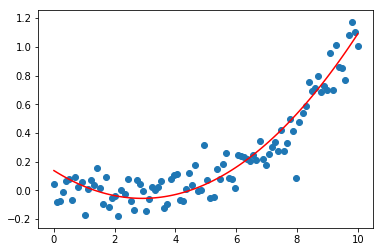

In [15]:
plt.scatter(x,y)
plt.plot(x,omegas[0]+omegas[1]*x+omegas[2]*x**2,c="r");

This looks nicer than before but, can we doit better? Probably fitting a polynomial of degree 5... and a polynomial of degree 10?

In [16]:
def train(x,y,degree=1):
    list_d = []
    for i in range(degree):
        list_d.append(x**i)
    train_data = np.vstack(list_d)
    return lin_reg(train_data,y)

In [17]:
train(x_train,y_train,3)

array([ 0.13671759, -0.13309091,  0.0228472 ])

Looks good, so now let us try a little bit...

In [18]:
degrees = [2,3,5,6,10,20]
models = []
for d in degrees:
    models.append(train(x_train,y_train,d))

In [19]:
def predict(x,omegas):
    list_d = []
    for i in range(len(omegas)):
        list_d.append(omegas[i]*x**i)
    train_data = np.vstack(list_d)
    return train_data.sum(axis=0)       

In [20]:
predictions = []
for m in models:
    predictions.append(predict(x,m))

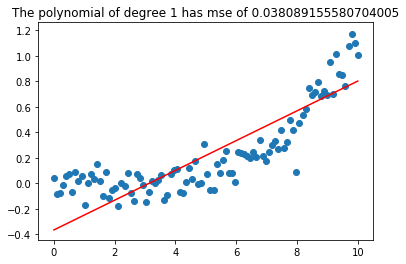

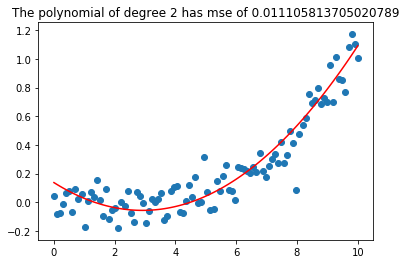

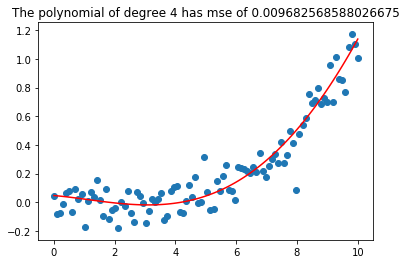

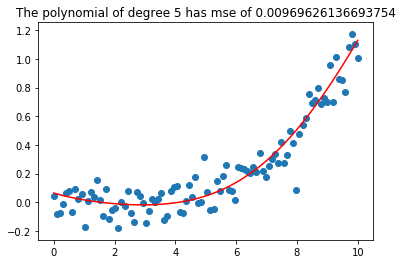

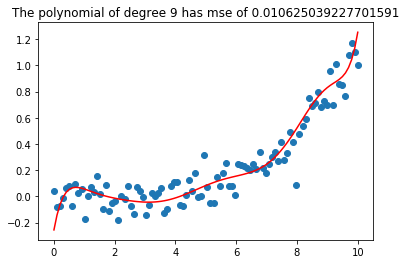

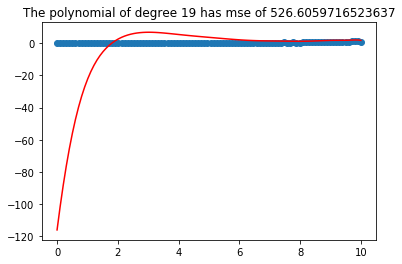

In [21]:
for i,prediction in enumerate(predictions):
    plt.title(f'The polynomial of degree {degrees[i]-1} has mse of {mse(prediction,y)}')
    plt.scatter(x,y)
    plt.plot(x,prediction,c="r")
    plt.show()

So as expected the best model (**correct capacity and no overfit**) is in average a polynomial of degree 5, and the error is a little bit higher than the variance of the noise added to the polynomial to generate the data.

In this particular case, the degree of the polynomial that we are fitting is what we call an **hyperparameter**. To tune those hyper-parameters we need what we call validation sets, to train the model with the training data, tune the hyper-parameters looking at the MSE of the validation set and testing our final tuned model on our test data never seen before at any step. 

Can we overfit on the test set? **Kaggle / iris dataset**

### Little break and plotly plots

In [22]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [23]:
def reg_plotly_plot(x,y,predictions,names):
    trace0 = go.Scatter(
        x = x,
        y = y,
        mode = 'markers',
        name = 'Data'
    )
    reg_traces = []
    for i,prediction in enumerate(predictions): ##lastone excluded because of visualization
        reg_traces.append(go.Scatter(
                                x = x,
                                y = prediction,
                                mode = 'lines',
                                name = f'Regressor {names[i]}',
                                text = f"MSE: {mse(prediction,y)}"
                                )
                         )

    layout = go.Layout(
        title = "Linear regression on synthetic data",
    )

    data = [trace0] + reg_traces
    return go.Figure(data=data, layout=layout)

iplot(reg_plotly_plot(x,y,predictions[:-1],["Linear of degree "+str(d) for d in np.array(degrees[:-1])-1]))

### K-NN


In [24]:
def simple_knn(x_test,y_test,x_train,y_train,kind="reg",k=5):
    y_preds = []
    for el in x_test:
        distances = np.abs(x_train - el)
        sorted_idxs = np.argsort(distances)
        idxs = sorted_idxs[:k]
        if kind=="clas":
            y_preds.append(np.round(y_train[idxs].mean()))
        else:
            y_preds.append(y_train[idxs].mean())
    return np.array(y_preds)

In [25]:
ks = [2,3,4,5,6]
predictions = []

for k in ks:
    predictions.append(simple_knn(x,y,x_train,y_train,k=k))    

In [26]:
iplot(reg_plotly_plot(x,y,predictions,["KNN of "+str(k)+" neighbours" for k in np.array(ks)]))

As we can see these models do not extrapolate well, as they need the neighbours, so they are intended for intrapolation. This is the main reason why most of the people uses K-NN for classification instead of using it for regression.

### Decision Tree

Models dicussed above, were designed before 1970. Decision Trees, and its variants, that we will analyze during the last part of the course, were designed around 1975, and its most recent versions are very new.

Building a DT from scratch is a little bit more difficult than the previous models, so we will split the process in the following steps:
* General Overview https://en.wikipedia.org/wiki/Decision_tree
* Minimization metric(s)
* Splitting the data
* Learning algorithm
* Building a tree
* Prediction

#### Minimization metrics

In [27]:
import pandas as pd

In [28]:
def reg_metric(df1,df2):
    size1,size2 = len(df1),len(df2)
    m1 = df1.iloc[:,-1].mean()
    m2 = df2.iloc[:,-1].mean()
    
    reg1 = np.sum((df1.iloc[:,-1].values - m1)**2) * (size1 / (size1+size2))
    reg2 = np.sum((df2.iloc[:,-1].values - m2)**2) * (size2 / (size1+size2))
    
    return  reg1+reg2  

In [29]:
def gini_metric(df1,df2,classes):
    size1,size2 = len(df1),len(df2)
    proportions1 = []
    proportions2 = []
    
    for c in classes:
        proportions1.append((len(df1[df1.iloc[:,-1] == c])/size1)**2)
        proportions2.append((len(df2[df2.iloc[:,-1] == c])/size2)**2)
    
    gini = (1.0 - sum(proportions1)) * (size1 / (size1+size2)) + \
           (1.0 - sum(proportions2)) * (size2 / (size1+size2)) 
    
    return gini

#### Splitting dataset

In [30]:
def split_df(column,value,df):
    return df[df[column] < value],df[df[column] >= value]

#### Learning algorithm

In [31]:
def best_split(df,kind="clas"):
    """
    labels column must be the last column
    """
    
    if kind == "clas":
        classes = df.iloc[:,-1].unique()

    b_index, b_value, b_score, b_groups = None, None, 1e1000, None
    m = 1e1000
    for column in df.columns.values.tolist()[:-1]:
        for idx,value in enumerate(df[column].values.tolist()):
            df1,df2 = split_df(column,value,df)
            try:
                if kind == "clas":
                    m = gini_metric(df1,df2,classes)
                else:
                    m = reg_metric(df1,df2)
            except ZeroDivisionError:
                continue
            if m < b_score:
                b_index, b_value, b_var, b_score, b_group = idx, value, column, m, [df1,df2]
    return {"split_idx":b_index, 
            "split_val":b_value, 
            "split_var":b_var, 
            "metric":b_score, 
            "left":b_group[0],
            "right":b_group[1]
            }

In [32]:
node = best_split(pd.DataFrame([x,y]).T,kind="reg")
node["split_val"]

7.474747474747475

#### Building a tree
* When a node is a leaf
* Recursive Splitting

In [33]:
def leaf(df,kind):
    if kind == "clas":
        return np.round(df.iloc[:,-1].mean())
    else:
        return df.iloc[:,-1].mean()

In [34]:
def split(node,max_depth,min_examples,depth,kind="clas"):
    df_left,df_right = node["left"].copy(),node["right"].copy()
    
    ## if the best split is no split
    if len(df_left) == 0 or len(df_right) == 0:
        df_left = df_right = leaf(pd.concat([df_left,df_right]),kind)

    ## check for max depth
    if depth >= max_depth:
        node["left"], node["right"] = leaf(df_left,kind), leaf(df_right,kind)
        return
    
    ## process left child
    if len(df_left) <= min_examples:
        node["left"] = leaf(df_left,kind)
    else:
        node["left"] = best_split(df_left,kind)
        split(node["left"], max_depth, min_examples, depth+1,kind)
    
    ## process right child
    if len(df_right) <= min_examples:
        node["right"] = leaf(df_right,kind)
    else:
        node["right"] = best_split(df_right,kind)
        split(node["right"], max_depth, min_examples, depth+1,kind)

Instantiate the tree

In [35]:
def build_tree(train_df, max_depth, min_examples,kind="clas"):
    root = best_split(train_df,kind)
    split(root,max_depth,min_examples,1,kind)
    return root

In [36]:
tree = build_tree(pd.DataFrame([x,y]).T,5,10,kind="reg")

Print function

In [37]:
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[Split at idx %d with value < %.3f]' % ((depth*' ', (node['split_idx']+1), node['split_val'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [38]:
print_tree(tree)

[Split at idx 75 with value < 7.475]
 [Split at idx 45 with value < 4.444]
  [Split at idx 19 with value < 1.818]
   [Split at idx 11 with value < 1.010]
    [0.011366172496107189]
    [0.013370306290006313]
   [Split at idx 15 with value < 3.232]
    [Split at idx 7 with value < 2.424]
     [-0.06816153549443012]
     [-0.02885898295384584]
    [Split at idx 7 with value < 3.838]
     [-0.018141767767130387]
     [0.02681765370564651]
  [Split at idx 17 with value < 6.061]
   [Split at idx 10 with value < 5.354]
    [0.06868736346958577]
    [0.12044667940117651]
   [Split at idx 8 with value < 6.768]
    [0.22688813132622607]
    [0.2708512178446153]
 [Split at idx 10 with value < 8.384]
  [0.4014720880911683]
  [Split at idx 10 with value < 9.293]
   [0.7460169435767158]
   [0.9815961129604346]


Now use the predict function

In [39]:
def predict(tree, example):
    if (example[tree["split_var"]] < tree["split_val"]).values[0]:
        if isinstance(tree["left"], dict):
            return predict(tree["left"], example)
        else:
            return tree["left"]
    else:
        if isinstance(tree["right"], dict):
            return predict(tree["right"], example)
        else:
            return tree["right"]


In [40]:
for i in range(5):#len(pd.DataFrame([x,y]).T)):
    example = pd.DataFrame([x,y]).T.iloc[i,:].to_frame().T
    print(predict(tree,example))

0.011366172496107189
0.011366172496107189
0.011366172496107189
0.011366172496107189
0.011366172496107189


Our particular example

In [41]:
tree = build_tree(pd.DataFrame([x_train,y_train]).T,5,10,kind="reg")
preds = []
for i in range(len(pd.DataFrame([x,y]).T)):
    example = pd.DataFrame([x,y]).T.iloc[i,:].to_frame().T
    preds.append(predict(tree,example))
    
iplot(reg_plotly_plot(x,y,
                      [np.array(preds)],
                      ["Decision Tree"]
                     )
     )

### SKLearn (very basic)

In [42]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [43]:
lin_reg = linear_model.RidgeCV()
lin_reg.fit(x_train.reshape(-1, 1),y_train)
lin_preds = lin_reg.predict(x.reshape(-1,1))

In [44]:
knn = KNeighborsRegressor(3)
knn.fit(x_train.reshape(-1,1), y_train)
knn_preds = knn.predict(x.reshape(-1,1))

In [45]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train.reshape(-1, 1),y_train)
dt_preds = dt_reg.predict(x.reshape(-1,1))

In [46]:
iplot(reg_plotly_plot(x,y,
                      [lin_preds,knn_preds,dt_preds],
                      ["Lin","KNN","DT"]
                     )
     )

### Classification and more dimensions (also synth)

First of all, create the data

In [47]:
c11 = np.random.rand(40,2)
c12 = np.array([0,.8])+np.array([2,1.1])*np.random.rand(30,2)
c21 = np.array([.8,0])+np.random.rand(60,2)

c1 = np.concatenate([c11,c12])
c2 = c21

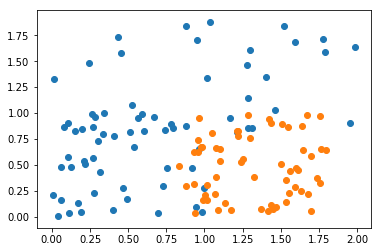

In [48]:
plt.scatter(c1[:,0],c1[:,1]); ## groundtruth
plt.scatter(c2[:,0],c2[:,1]);

In [49]:
import pandas as pd

In [50]:
c1 = np.append(c1, np.ones([len(c1),1]), axis=1)
c2 = np.append(c2, 2*np.ones([len(c2),1]), axis=1)

In [51]:
data = pd.DataFrame(np.concatenate([c1,c2]),columns=["var1","var2","label"])

In [52]:
data = data.sample(frac=1)

In [53]:
data.head()

,var1,var2,label
64,0.524347,1.079265,1.0
110,0.930823,0.315078,2.0
62,0.284256,0.958363,1.0
115,1.074813,0.386900,2.0
55,1.313293,0.854282,1.0


In [54]:
train_data = data.values[:int(.7*len(data))]
test_data = data.values[int(.7*len(data)):]

In [55]:
x_train,y_train = train_data[:,:-1],train_data[:,-1]
x_test,y_test = test_data[:,:-1],test_data[:,-1]

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.predict(x_test)

array([1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2.])

In [58]:
neigh.score(x_test,y_test),neigh.score(x_train,y_train)

(0.8205128205128205, 0.9120879120879121)

In [59]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
dt.predict(x_test)

array([1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 1., 2., 2.])

In [60]:
dt.score(x_test,y_test),dt.score(x_train,y_train)

(0.7948717948717948, 1.0)

In [61]:
def clas_plotly_plot(data,model,name):

    true1 = np.where(data[:,2] == 1)[0]
    true2 = np.where(data[:,2] == 2)[0]
    
    pred1 = np.where(model.predict(data[:,:-1]) == 1)[0]
    pred2 = np.where(model.predict(data[:,:-1]) == 2)[0]
    
    trace_true1 = go.Scatter(
        x = data[true1,0],
        y = data[true1,1],
        mode = 'markers',
        name = 'True 1',
        marker = dict(
            size = 10,
            color = 'rgba(0, 0, 255, .5)'
        )
    )
    trace_true2 = go.Scatter(
        x = data[true2,0],
        y = data[true2,1],
        mode = 'markers',
        name = 'True 2',
        marker = dict(
            size = 10,
            color = 'rgba(0, 255, 0, .5)'
        )
    )
    
    trace_pred1 = go.Scatter(
        x = data[pred1,0],
        y = data[pred1,1],
        mode = 'markers',
        name = 'Pred 1',
        marker = dict(
            size = 10,
            color = 'rgba(0, 0, 255, .5)'
        )
    )
    trace_pred2 = go.Scatter(
        x = data[pred2,0],
        y = data[pred2,1],
        mode = 'markers',
        name = 'Pred 2',
        marker = dict(
            size = 10,
            color = 'rgba(0, 255, 0, .5)'
        )
    )
    layout = go.Layout(
        title = f"Classification of {name} on synthetic data",
    )

    data = [trace_true1,trace_true2,trace_pred1,trace_pred2]
    return go.Figure(data=data, layout=layout)

In [62]:
iplot(clas_plotly_plot(data.values,dt,"Decision Tree"))

In [63]:
iplot(clas_plotly_plot(data.values,neigh,"KNN"))

<span style="color:blue">**In-class**: Add true positive, false positive, true negative, false negative information to the plot. </span>

<span style="color:blue">**In-class**: Synthetize your own data using numpy and test some models, can be regression or classification. </span>